In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot

plt.rcParams['figure.figsize'] = (10,10)

In [226]:
df = pd.read_csv('satelites.csv')

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Class of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Contractor,Country of Contractor,Launch Site,Launch Vehicle
0,1HOPSAT-TD (1st-generation High Optical Perfor...,Lemur,NR (12/20),USA,Hera Systems,Commercial,Earth Observation,LEO,0,566.0,576.0,0.000720,36.90,96.08,22.0,2019-12-11,Hera Systems,USA,Satish Dhawan Space Centre,PSLV
1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,LEO,0,497.0,517.0,0.001454,97.45,94.70,4.5,2017-06-23,Aalto University,Finland,Satish Dhawan Space Centre,PSLV
2,AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,LEO,0,442.0,687.0,0.017665,98.20,95.90,1.0,2016-04-25,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a
3,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,75,35778.0,35793.0,0.000178,0.08,1436.03,6330.0,2014-02-06,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA
4,ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,-75,35700.0,35700.0,0.000000,0.00,1436.10,1800.0,2016-06-15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,Ziyuan 1-02C,Ziyuan 1-02C,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,0,763.0,773.0,0.000700,98.56,100.20,1500.0,2011-12-22,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B
4546,Ziyuan 1-2D,Ziyuan 1-2D,NR,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,0,748.0,758.0,0.000702,98.50,99.80,2650.0,2019-09-14,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B
4547,Ziyuan 3 (ZY-3),Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,0,500.0,504.0,0.000291,97.50,94.70,2650.0,2012-01-09,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B
4548,Ziyuan 3-2,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,0,487.0,500.0,0.000947,97.50,94.49,2630.0,2016-05-29,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B


Principales Operadores

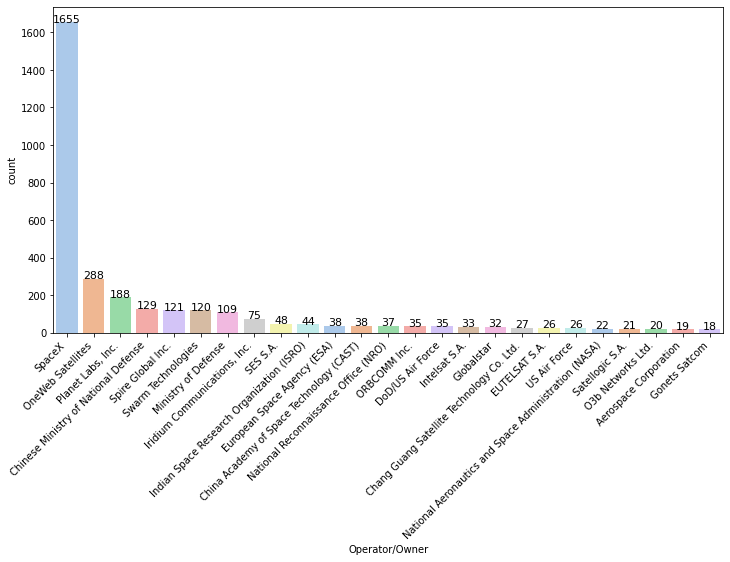

In [203]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='Operator/Owner', order=df['Operator/Owner'].value_counts().iloc[:25].index, ax=ax, palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
plt.show()

Principales Países

In [204]:
df['Date of Launch'] = pd.to_datetime(df['Date of Launch'])
year_values = pd.DatetimeIndex(df['Date of Launch']).year
df.insert(10, 'Year of Launch', year_values) #Creamos columna año lanzamiento
lanzamientos = df.groupby(pd.DatetimeIndex(df['Date of Launch']).year)['Date of Launch'].count().tail(25)

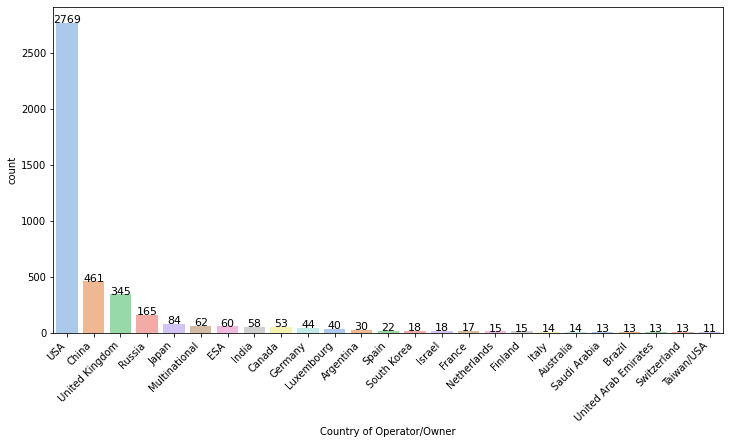

In [205]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='Country of Operator/Owner', order=df['Country of Operator/Owner'].value_counts().iloc[:25].index, ax=ax, palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
plt.show()

nº Satélites lanzados últimos 25 años

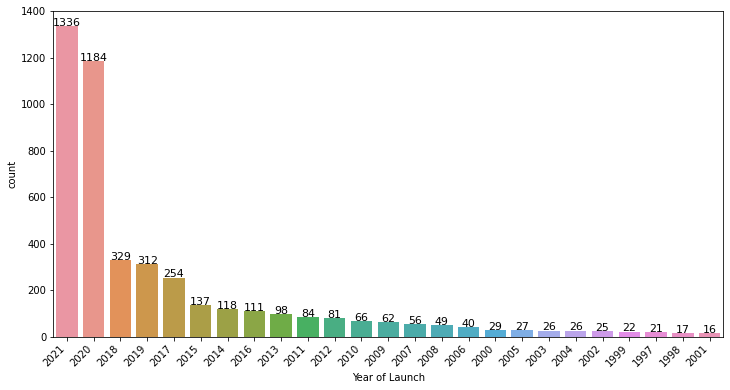

In [206]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='Year of Launch', order=df['Year of Launch'].value_counts().iloc[:25].index, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
plt.show()

Lanzadera

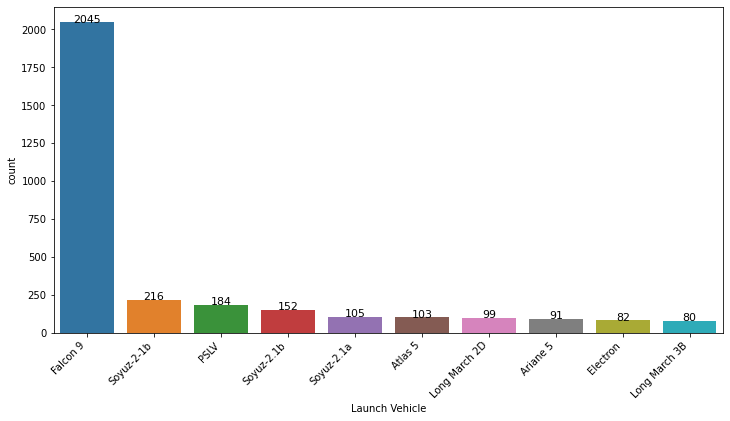

In [207]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='Launch Vehicle', order=df['Launch Vehicle'].value_counts().iloc[:10].index, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
plt.show()


Órbita

<AxesSubplot:xlabel='Class of Orbit', ylabel='count'>

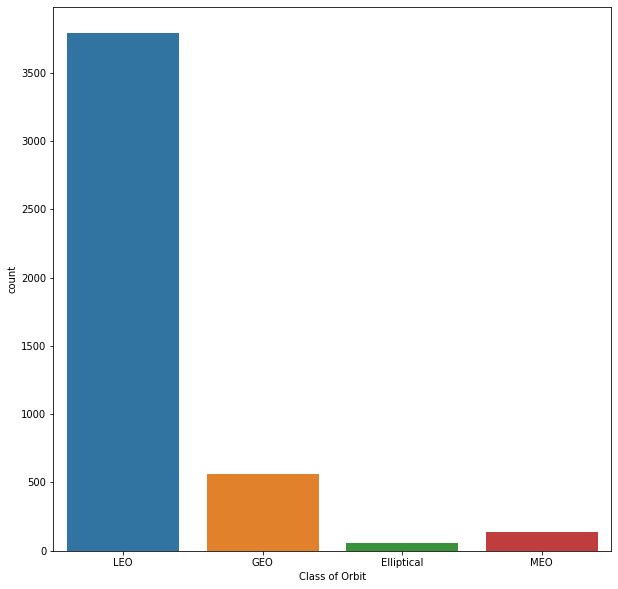

In [208]:
orbita = df.groupby(['Class of Orbit'])['Class of Orbit'].count().nlargest(5)
sns.countplot(data=df, x='Class of Orbit')

Comprobamos si existe correlación en los datos numéricos

In [209]:
df_corr = df.corr()
df_corr

,Perigee (km),Year of Launch,Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.)
Perigee (km),1.000000,-0.494913,0.790793,-0.002451,-0.709783,0.846094,0.721440
Year of Launch,-0.494913,1.000000,-0.461649,-0.149330,0.255372,-0.457567,-0.448257
Apogee (km),0.790793,-0.461649,1.000000,0.475850,-0.571362,0.975930,0.585562
Eccentricity,-0.002451,-0.149330,0.475850,1.000000,-0.042212,0.323961,0.087563
Inclination (degrees),-0.709783,0.255372,-0.571362,-0.042212,1.000000,-0.608505,-0.525444
Period (minutes),0.846094,-0.457567,0.975930,0.323961,-0.608505,1.000000,0.618491
Launch Mass (kg.),0.721440,-0.448257,0.585562,0.087563,-0.525444,0.618491,1.000000


<AxesSubplot:>

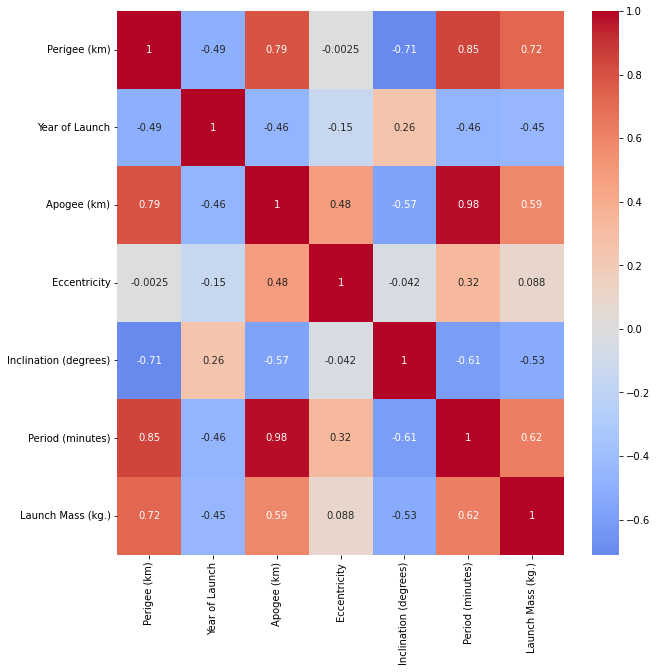

In [225]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, center=False)

Correlación Apogeo/Perigeo al ser el punto orbital opuesto 

In [211]:
#sns.pairplot(df)

PEARSON CHI-2 TEST  
Satelites lanzados a LEO. Existe una relación respecto a la lanzadera Falcon9 ?

In [212]:
f9_leo = pd.crosstab(index=df['Launch Vehicle']=='Falcon 9', columns=df['Class of Orbit']=='LEO')
f9_leo

Class of Orbit,False,True
Launch Vehicle,,
False,721,1784
True,39,2006


In [213]:
chiVal, pVal, df_chiVal, exp = chi2_contingency(f9_leo)
chiVal, pVal, df_chiVal, exp 

(582.5473644950413,
 1.0470783503883877e-128,
 1,
 array([[ 418.41758242, 2086.58241758],
        [ 341.58241758, 1703.41758242]]))

P-Value is < 0,05 por lo que texiste una asociación entre los 2 valores

-------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------

TOMANDO COMO REFERENCIA LOS ÚLTIMOS 10 AÑOS, ¿CUANTOS SATELITES SE LANZARÁN EN 2022?

In [214]:
df2 = df[['Country of Operator/Owner', 'Date of Launch', 'Year of Launch', 'Launch Vehicle', 'Class of Orbit']].copy()
df_last10y = df.loc[(df['Launch Vehicle']== 'Falcon 9') | (df['Year of Launch'] > 2011)]
df_last10y_count = df_last10y.groupby(['Year of Launch'])['Launch Vehicle'].count()
df_last10y_count

Year of Launch
2012      81
2013      98
2014     118
2015     137
2016     111
2017     254
2018     329
2019     312
2020    1184
2021    1336
Name: Launch Vehicle, dtype: int64

Satélites lanzados por año

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Launch Vehicle'>

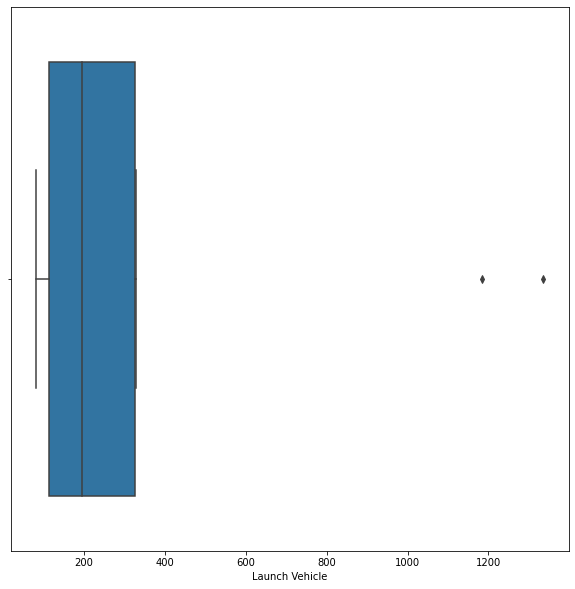

In [215]:
sns.boxplot(df_last10y_count)

<AxesSubplot:xlabel='Date of Launch', ylabel='Class of Orbit'>

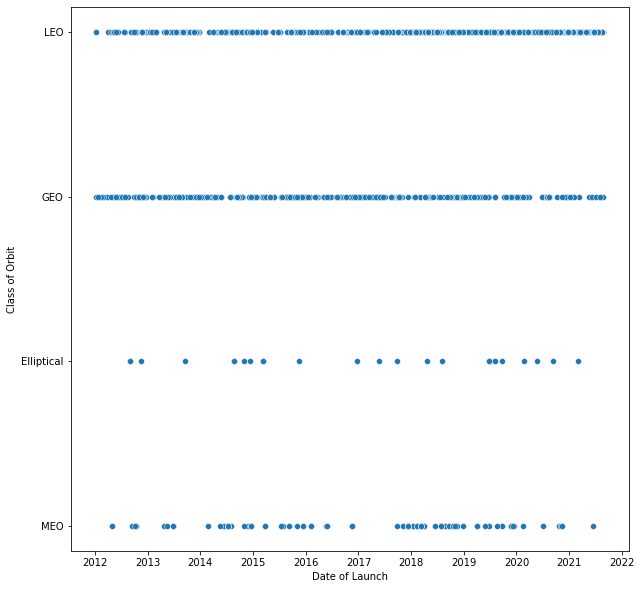

In [216]:
sns.scatterplot(x='Date of Launch',
                y='Class of Orbit',
                data=df_last10y)

Por tipo de órbita, existe una diferencia significativa en cuanto a los años de lanzamiento, en los que predominan órbita terrestre baja (LEO) y La órbita geosíncrona (GEO). 

<AxesSubplot:xlabel='Year of Launch'>

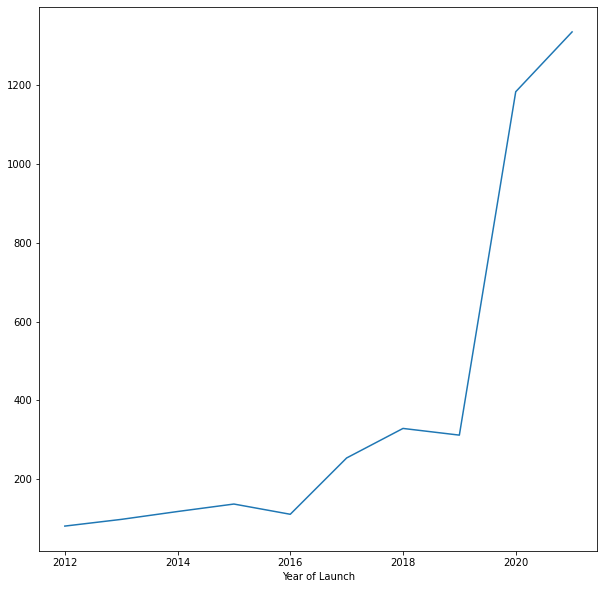

In [217]:
df_last10y_count.plot()

Existe una diferencia muy significativa en cuanto a nº de lanzamientos en los últimos 2 años.

In [218]:
type(df_last10y_count)

pandas.core.series.Series

In [251]:
df_last10y_count.to_frame(name='Number')

,Number
Year of Launch,
2012,81
2013,98
2014,118
2015,137
2016,111
2017,254
2018,329
2019,312
2020,1184


In [289]:
data=data.reset_index()
data['Year of Launch']

0    2012
1    2013
2    2014
3    2015
4    2016
5    2017
6    2018
7    2019
8    2020
9    2021
Name: Year of Launch, dtype: int64

In [ ]:
data = df_last10y_count.to_frame(name='Number') # load data set

In [316]:
data

,Year of Launch,Number
0,2012,81
1,2013,98
2,2014,118
3,2015,137
4,2016,111
5,2017,254
6,2018,329
7,2019,312
8,2020,1184
9,2021,1336


In [317]:

X =  data['Year of Launch']# values converts it into a numpy array
Y = data.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

In [318]:
data = data.reset_index()

In [319]:

X =  data[['Year of Launch']]# values converts it into a numpy array
Y = data['Number']

In [320]:
X

,Year of Launch
0,2012
1,2013
2,2014
3,2015
4,2016
5,2017
6,2018
7,2019
8,2020
9,2021


In [321]:

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [324]:
linear_regressor.coef_


array([124.76363636])

In [325]:
linear_regressor.intercept_

-251189.8727272728

In [326]:
linear_regressor.intercept_ + 2022 * linear_regressor.coef_

array([1082.2])

In [328]:
future = pd.DataFrame([2022,2023], columns=['Year of Launch'])

In [331]:
linear_regressor.predict(future)

array([1082.2       , 1206.96363636])

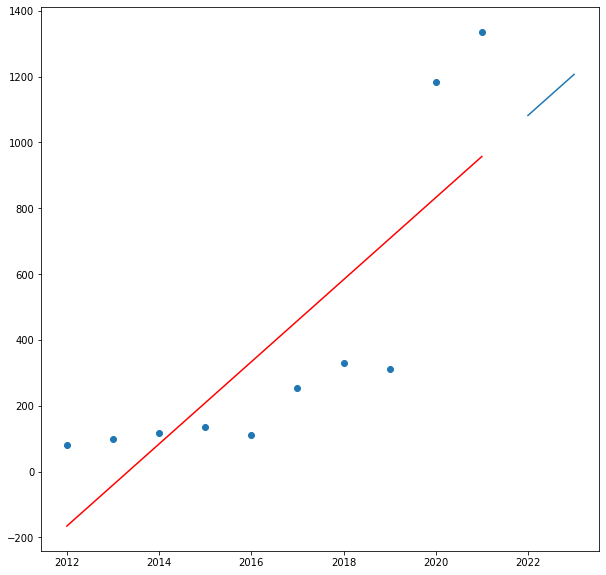

In [333]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.plot(future, linear_regressor.predict(future))
plt.show()